# Marc Partensky

In [1]:
!python -V

Python 3.9.16


In [21]:
!python -m pip install -U pip numpy matplotlib scipy networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:0000:0100:01


In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [8]:
with open('encodings.pickle', 'rb') as file:
    encodings = pickle.load(file)

print(encodings.shape)

(512, 200)


# KNN

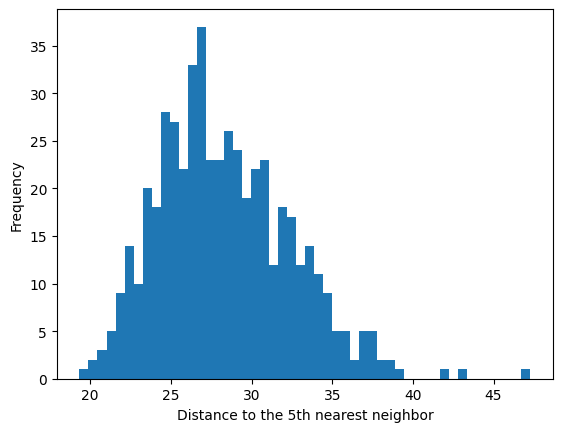

In [9]:
from scipy.spatial.distance import cdist

n_neighbors = 5  # number of neighbors to consider
distances = cdist(encodings, encodings, 'euclidean')
sorted_distances = np.sort(distances, axis=1)
dist_to_nth_neighbor = sorted_distances[:, n_neighbors - 1]

# Plot the distribution of distances
plt.hist(dist_to_nth_neighbor, bins=50)
plt.xlabel('Distance to the {}th nearest neighbor'.format(n_neighbors))
plt.ylabel('Frequency')
plt.show()

In [10]:
X = encodings

# Scatter plot

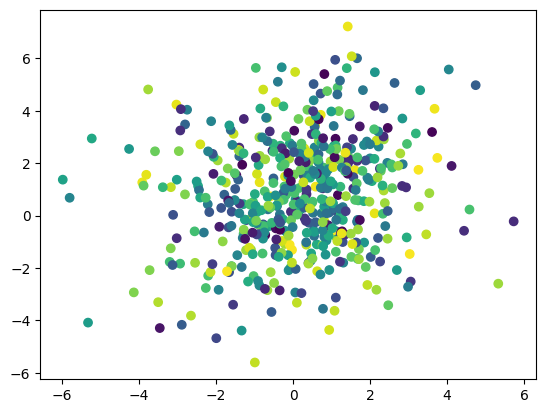

In [18]:
# Compute pairwise distances between vectors
distances = cdist(X, X)

# Find KNN indices for each vector
k = 5
indices = np.argsort(distances, axis=1)[:, 1:k+1]

# Plot scatter plot of vectors colored by KNN label
plt.scatter(X[:, 0], X[:, 1], c=indices[:, 0])
plt.show()


# Bar chart

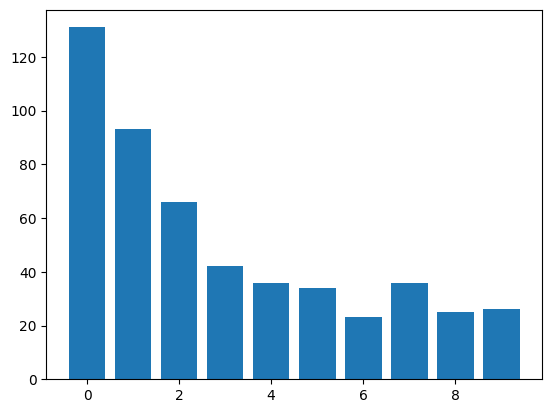

In [13]:
# Compute pairwise distances between vectors
distances = cdist(X, X)

# Compute KNN labels for each vector
k = 5
labels = np.zeros(512)
for i in range(512):
    knn_indices = np.argsort(distances[i])[1:k+1]
    knn_labels = np.random.randint(0, 10, size=k)
    labels[i] = np.bincount(knn_labels).argmax()

# Get label counts
label_counts = np.zeros(10)
for label in labels:
    label_counts[int(label)] += 1

# Plot bar chart of label counts
plt.bar(np.arange(10), label_counts)
plt.show()


# Heatmap

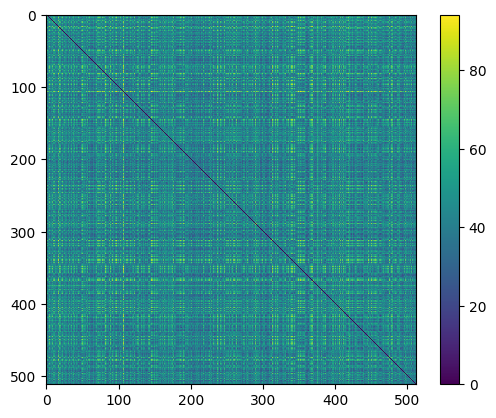

In [14]:
# Compute pairwise distances between vectors
distances = cdist(X, X)

# Plot heatmap of distances between vectors
plt.imshow(distances, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

# Network graph

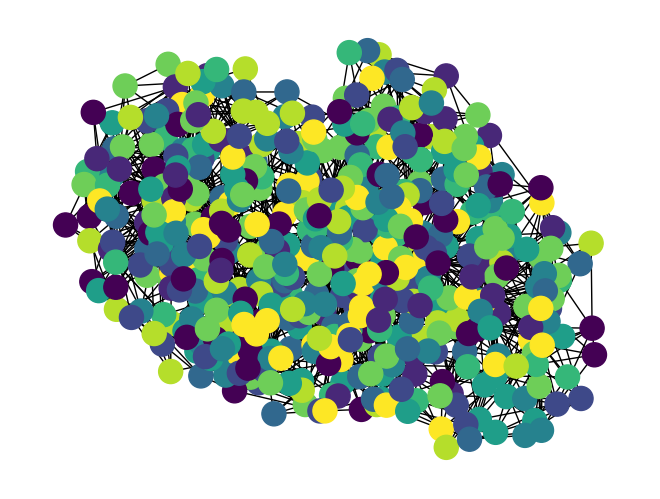

In [22]:
import networkx as nx
# Compute pairwise distances between vectors
distances = cdist(X, X)

# Create network graph
G = nx.Graph()
for i in range(512):
    G.add_node(i, label=np.random.randint(0, 10))
for i in range(512):
    knn_indices = np.argsort(distances[i])[1:6]
    for j in knn_indices:
        G.add_edge(i, j)

# Plot network graph
node_colors = [G.nodes[i]['label'] for i in range(512)]
nx.draw_kamada_kawai(G, node_color=node_colors, with_labels=False)
plt.show()